In [1]:
import numpy as np
import matplotlib.pyplot as plt

import phaseunwrapping

# Make toy problem

In [17]:
# Parameters
n = 100
sigma = 1.0
mu_x_one = 0.0
mu_y_one = 0.0
mu_x_two = 0.3
mu_y_two = 0.0


# Setup
def gaussian_kernel_2d(x, y, sigma, mu_x=0.0, mu_y=0.0):
    return np.exp( -( (x - mu_x)**2 + (y - mu_y)**2)/(2 * sigma**2) )/(2*np.pi * sigma**2)

x = np.linspace(-5*sigma, 5*sigma, n)
y = np.linspace(-5*sigma, 5*sigma, n)

X, Y = np.meshgrid(x, y)
first_state = gaussian_kernel_2d(X, Y, sigma, mu_x=mu_x_one, mu_y=mu_y_one)
second_state = gaussian_kernel_2d(X, Y, sigma, mu_x=mu_x_two, mu_y=mu_y_two)




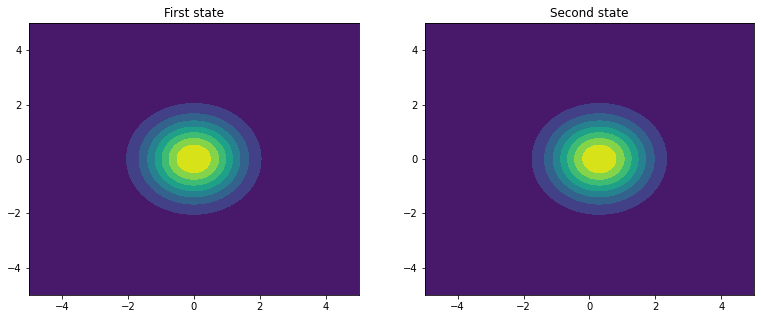

In [18]:
fig, axs = plt.subplots(1,2,figsize=(13,5))

axs[0].contourf(X, Y, first_state, cmap="viridis")
axs[0].set_title("First state")

axs[1].contourf(X, Y, second_state, cmap="viridis")
axs[1].set_title("Second state")

plt.show()

# Try FFT stuff

In [20]:
fft_first_state = np.fft.fft2(first_state, norm="ortho")
fft_second_state = np.fft.fft2(second_state, norm="ortho")

phase_fft_first_state = np.angle(fft_first_state)
phase_fft_second_state = np.angle(fft_second_state)

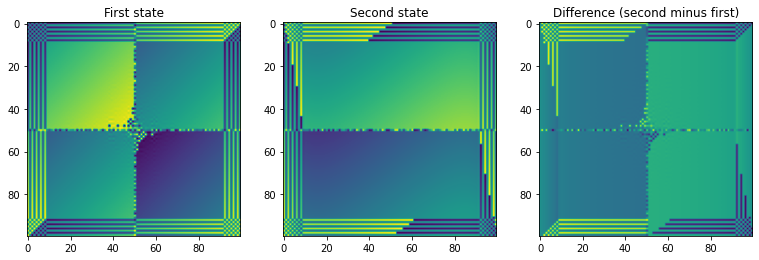

In [21]:
fig, axs = plt.subplots(1,3,figsize=(13,5))

axs[0].imshow(phase_fft_first_state)
axs[0].set_title("First state")

axs[1].imshow(phase_fft_second_state)
axs[1].set_title("Second state")

axs[2].imshow(phase_fft_second_state - phase_fft_first_state)
axs[2].set_title("Difference (second minus first)")

plt.show()